In [1]:
import pandas as pd
from collections import Counter
from mycolorpy import colorlist as mcp
import matplotlib.pyplot as plt
import numpy as np
import xtarfile as tarfile

# Try little owncloud thing

In [2]:
import owncloud

In [8]:
oc = owncloud.Client('https://surfdrive.surf.nl/files')

HTTPResponseError: HTTP error: 401

## DBC

## A. Book info

In [2]:
file_url = 'https://morty.dbc.dk/MKEHkDbqWnd7B5MZy25ExyBQ3n/materials_with_udlaan_with_isbn.jsonl'

In [3]:
book_info = pd.read_json(file_url, lines=True)

In [4]:
book_info.head()

,_id,creator,title,type,subject-term,language,isbn
0,150008-academic:ebr10306242,Rainer Crime Concern,Children and young people in custody : managin...,book,"[Juvenile delinquents -- Rehabilitation, Elect...",Engelsk,None
1,150008-academic:ebr10595446,Frederick Murphy,"Community engagement, organization, and develo...",book,"[Public health administration, Community healt...",Engelsk,None
2,150008-academic:ebr10660579,Rachel A. Powsner,Essentials of nuclear medicine physics and ins...,book,"[Electronic books, Medical physics, Nuclear me...",Engelsk,None
3,150008-academic:ebr10660927,Donald Rayfield,Edge of empires : a history of Georgia,book,"[Electronic books, Georgia (Republic), Georgia...",Engelsk,None
4,150008-academic:ebr10828172,Joel Elad,LinkedIn for dummies,book,"[Electronic books, Computer networks, Business...",Engelsk,None


In [5]:
len(book_info)

412742

## B. Loans

In [6]:
location = 'data/large_files/'

In [7]:
filename = 'hack4dk_2023_dbc.tar.gz'

In [8]:
location+filename

'data/large_files/hack4dk_2023_dbc.tar.gz'

In [9]:
with tarfile.open(location+filename, 'r') as archive:
    archive.extractall(location)

In [10]:
loan_location = location + 'hack4dk2017/'

In [11]:
loans = pd.read_csv(loan_location+'udlaan.csv.gz', compression='gzip')

In [12]:
len(loans)

238609626

In [13]:
loans.head()

,laaner_id,biblioteks_id,materiale_id,koen,foedselsaar,dato
0,0,782000,870970-basis:27889107,k,1973-01-01,2015-03-04
1,0,782000,870970-basis:27873251,k,1973-01-01,2015-03-04
2,0,782000,870970-basis:28489595,k,1973-01-01,2015-03-04
3,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04
4,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04


In [14]:
loans.columns = ['user','library','item', 'gender', 'birthyear', 'date']

In [15]:
unique_users = loans.user.unique()
unique_items = loans.item.unique()
num_users = len(unique_users)
num_items = len(unique_items)

In [16]:
book_info.columns = ['item','author','title','type','subject','language','isbn']

##### Merge!!

In [17]:
loans_with_info = pd.merge(loans, book_info, on = 'item', how='inner')

In [18]:
len(loans), len(loans_with_info)

(238609626, 181670838)

In [19]:
unique_loans_items = loans.drop_duplicates('item').item.values

In [20]:
len(unique_loans_items)

607885

In [21]:
books_in_loans = book_info[book_info.item.isin(unique_loans_items)].reset_index(drop=True)

In [22]:
len(book_info),len(books_in_loans)

(412742, 412742)

All books that Nicolaj sent me have participated in loans.

In [23]:
books_in_loans

,item,author,title,type,subject,language,isbn
0,150008-academic:ebr10306242,Rainer Crime Concern,Children and young people in custody : managin...,book,"[Juvenile delinquents -- Rehabilitation, Elect...",Engelsk,None
1,150008-academic:ebr10595446,Frederick Murphy,"Community engagement, organization, and develo...",book,"[Public health administration, Community healt...",Engelsk,None
2,150008-academic:ebr10660579,Rachel A. Powsner,Essentials of nuclear medicine physics and ins...,book,"[Electronic books, Medical physics, Nuclear me...",Engelsk,None
3,150008-academic:ebr10660927,Donald Rayfield,Edge of empires : a history of Georgia,book,"[Electronic books, Georgia (Republic), Georgia...",Engelsk,None
4,150008-academic:ebr10828172,Joel Elad,LinkedIn for dummies,book,"[Electronic books, Computer networks, Business...",Engelsk,None
...,...,...,...,...,...,...,...
412737,870970-basis:55094896,Ejler Nielsen (f. 1916),Træk af Gørding sogns historie,book,"[Enkelte lokaliteter uden for København, Gørdi...",Dansk,None
412738,870970-basis:55095000,Sa¯diq Hida¯yat,Complete works,book,"[Iranske litteraturer. Persisk litteratur, 88.42]",Persisk,None
412739,870970-basis:55095183,Harriet Beecher Stowe,A key to Uncle Tom's cabin : presenting the or...,book,"[83, Amerikansk skønlitteratur, Engelsk skønli...",Tysk,None
412740,874310-katalog:DBB0605044,Ivar Cornelius Petersen (f. 1946),Naturundersøgelser,book,"[Naturvidenskabelig teknik i alm., undervisnin...",Dansk,None


In [24]:
nonan_books = books_in_loans.fillna('')
nonan_books.isbn = nonan_books.isbn.astype(str)

In [25]:
len(nonan_books[nonan_books.isbn!=''])

347843

so 348K books have ISBN

In [26]:
len(nonan_books.drop_duplicates(subset=['isbn']))

347203

347K unique ISBNs

In [27]:
nonan_books[nonan_books.isbn=="['87-13-01246-0']"]

,item,author,title,type,subject,language,isbn
11651,870970-basis:01205374,Johan Brinth,Fåret,book,"[Får og geder, Klassesæt, Lettal 14, 63.63, La...",Dansk,['87-13-01246-0']
11653,870970-basis:01205420,Johan Brinth,Geden,book,"[Bondegård, Lettal 13, Let 13, 63.63, Får og g...",Dansk,['87-13-01246-0']
11655,870970-basis:01205455,Johan Brinth,Grisen,book,"[Svin, Let 15, Lettal 15, 63.64, Klassesæt, La...",Dansk,['87-13-01246-0']
11656,870970-basis:01205471,Johan Brinth,Hesten,book,"[1.- 3.klasse, KLASSESÆT, Heste, BIOLOGI, DANS...",Dansk,['87-13-01246-0']
11657,870970-basis:01205528,Johan Brinth,Hønsene,book,"[Lettal 15, Fugle, 63.651, Klassesæt, Høns, La...",Dansk,['87-13-01246-0']


Questions to ask Nikolaj:
1. Duplicate ISBNs
2. Multiple ISBNs

In [28]:
nonan_loans_with_info = loans_with_info.fillna('')
nonan_loans_with_info.isbn = nonan_loans_with_info.isbn.astype(str)

In [29]:
nonan_loans_with_info.head()

,user,library,item,gender,birthyear,date,author,title,type,subject,language,isbn
0,0,782000,870970-basis:27889107,k,1973-01-01,2015-03-04,Bjarne Dalsgꜳrd Svendsen,Gogo bliver passet,book,"[for 11 år, for 9-11 år, for 9 år, sk, sjove b...",Dansk,['9788779160798']
1,0,782000,870970-basis:27873251,k,1973-01-01,2015-03-04,Bjarne Dalsgꜳrd Svendsen,Gogo på lejrtur,book,"[for 11 år, for 9-11 år, for 9 år, sk, sjove b...",Dansk,['9788779160781']
2,0,782000,870970-basis:28489595,k,1973-01-01,2015-03-04,Stephen Parkhouse,Toms drageballade,book,"[for 11 år, humor, for 9-11 år, for 9 år, sk, ...",Dansk,['9788762715967']
3,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04,Sussi Bech,Gustav og Raketbroderskabet,book,"[for 12 år, for 11 år, for 9 år, sk, science f...",Dansk,['9788799750016']
4,0,782000,870970-basis:51267699,k,1973-01-01,2015-03-04,Sussi Bech,Gustav og Raketbroderskabet,book,"[for 12 år, for 11 år, for 9 år, sk, science f...",Dansk,['9788799750016']


#### Save!

In [ ]:
nonan_loans_with_info.to_pickle(location+'DBC_loans.pkl.gz', compression = 'gzip')
nonan_books.to_pickle(location+'DBC_books.pkl.gz', compression = 'gzip')

In [ ]:
dfs = [nonan_books.copy(), nonan_loans_with_info.copy()]

##### Save!

##### Analyze!

In [44]:
color_map=mcp.gen_color(cmap="Pastel2",n=8)
print(color_map)

['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9', '#fff2ae', '#f1e2cc', '#cccccc']


In [45]:
for df in dfs:
    # replace empty string with "unknown"
    df["language"] = df["language"].apply(lambda x: "unknown" if x=='' else x)
    # flag as "other" if neither male, nor female, nor unknown
    df["language"] = df["language"].apply(lambda x: "other" if (x!="Engelsk")&(x!="Dansk")&(x!="unknown") else x) 

In [46]:
colors = {}
i = 0
for language_value in dfs[0].language.unique(): # books contains all languages.
    colors[language_value] = color_map[i]
    i+=1

In [47]:
Counter(dfs[0].language)

Counter({'unknown': 155375,
         'other': 832343,
         'Dansk': 1875835,
         'Engelsk': 1289935})

In [48]:
dfs_names = ['Unique Books', 'Unique Books in Loans', 'Books in Loans', 'Unique Books']

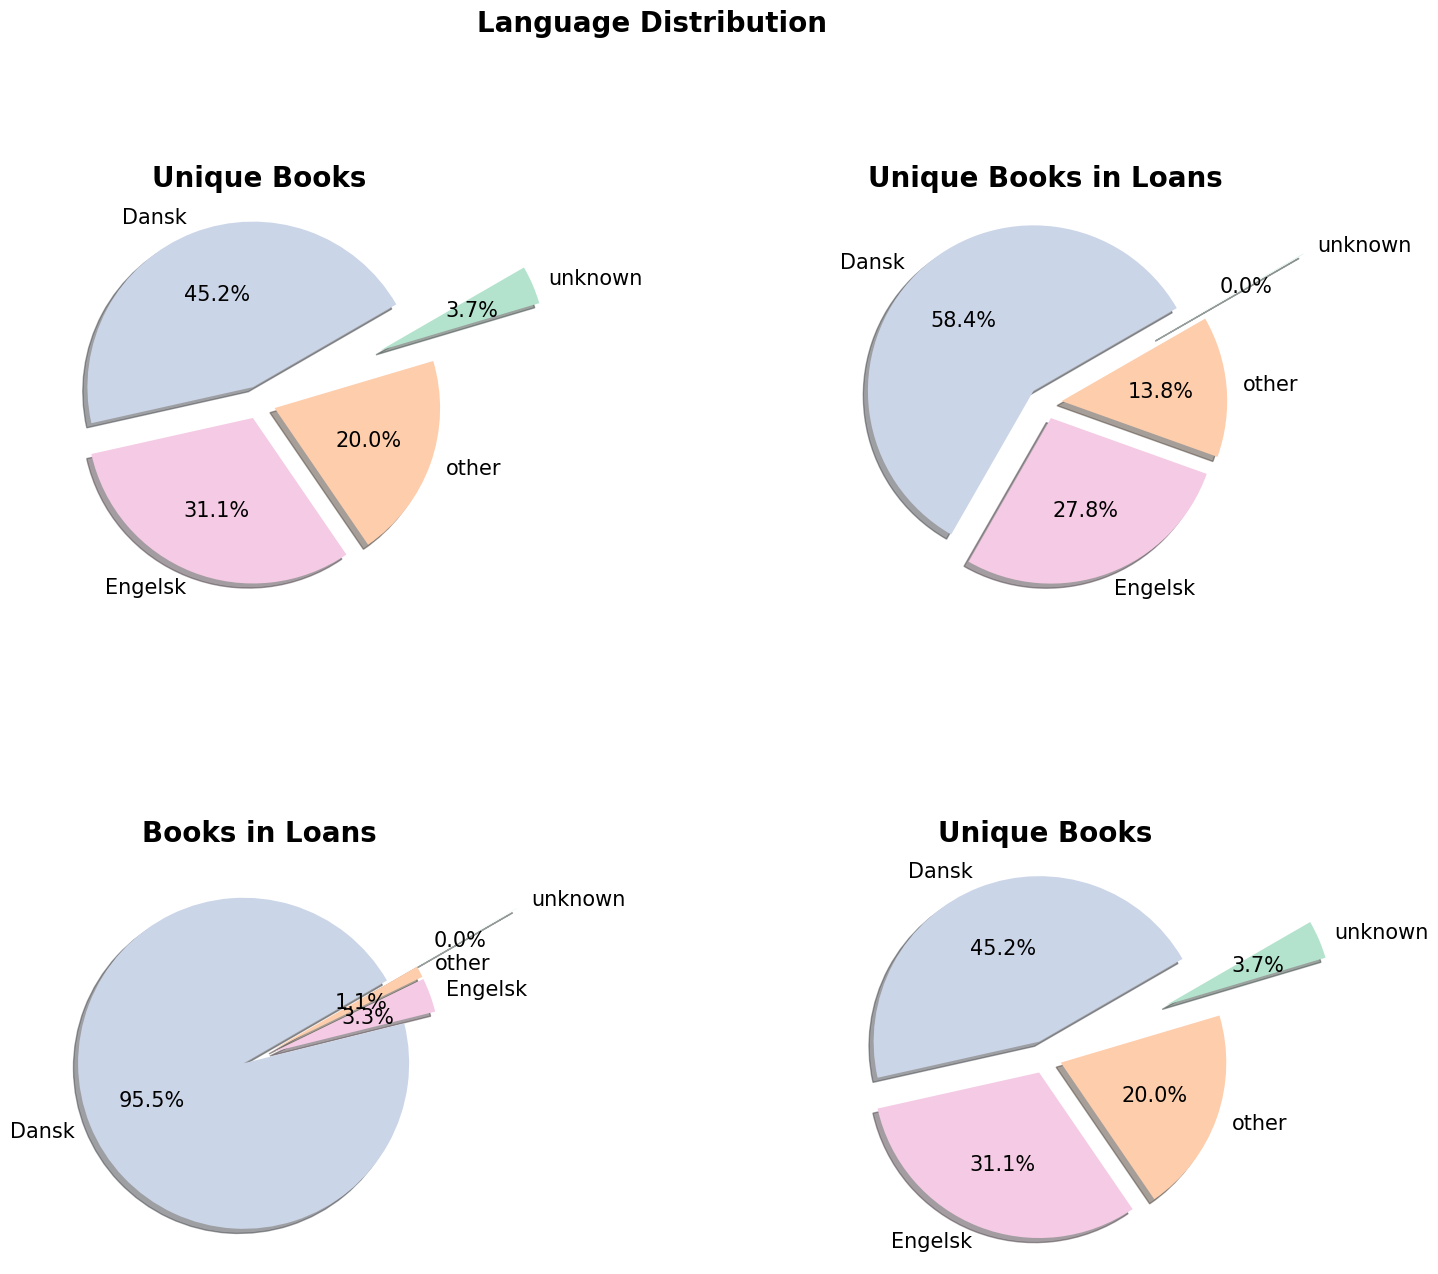

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
for i in range(len(dfs)):
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    dfs[i].language.value_counts().plot(kind="pie",autopct='%1.1f%%',explode=(0.1, 0.1, 0.1,0.8), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)],
                                      textprops={'color':'black', 'fontsize':15},
                                     colors=[colors[v] for v in dfs[i]['language'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].set_title(dfs_names[i],fontdict={'fontsize':20, 'weight':'bold'})
    axes[int(j1),int(j2)].set_ylabel('')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)

fig.suptitle('Language Distribution',fontsize = 20, weight="bold") 
fig.show()
